In [1]:
# Install bmi_nwis if it doesn't exist
# !pip install bmi_nwis

In [2]:
import dataretrieval.nwis as nwis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data from the USGS stream gauge site 

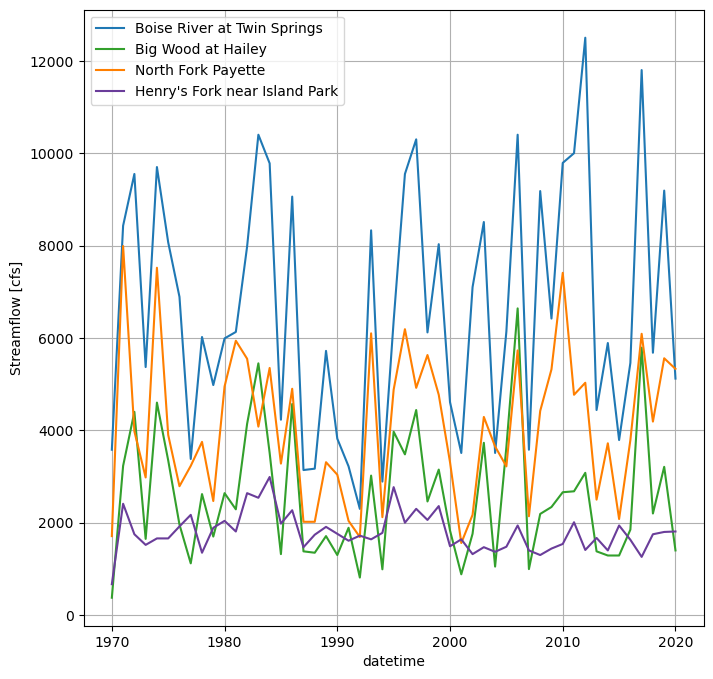

In [3]:
# define site names and site ID numbers
site_names = ["Boise River at Twin Springs", "Big Wood at Hailey", 
         "North Fork Payette", "Henry's Fork near Island Park"]
site_ids = ['13185000', '13139510', '13246000', '13042500'] 

# define start and end dates
start_date = '1970-10-01'
end_date = '2020-09-30'

# define colors for plotting
colors = ['#1f78b4', '#33a02c', '#ff7f00', '#6a3d9a']

# set up figure
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.set_ylabel('Streamflow [cfs]')

for site_id, site_name, color in list(zip(site_ids, site_names, colors)):
    # Load data from USGS stream gauge site(s)
    dataset = nwis.get_record(sites=site_id, service='dv', start=start_date, end=end_date)
    
    # grab the annual maximum streamflow
    df_yr = dataset['00060_Mean'].groupby(dataset.index.year).max()
    
    # plot
    df_yr.plot(label=site_name, color=color)

ax.legend()
ax.grid()
plt.show()